(1080, 1920, 3)
255 0
255 0
255 0
176.0


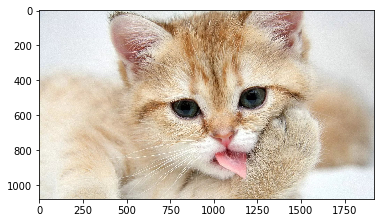

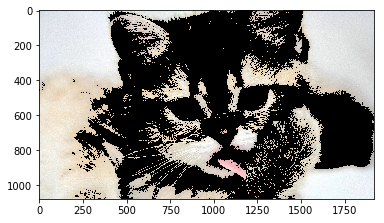

In [2]:
#task 1
import skimage
from skimage import data
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

image = io.imread('cat.jpg')
print(image.shape)

max_r = image[:, :, 0].max()
min_r = image[:, :, 0].min()
print(max_r, min_r)
max_g = image[:, :, 1].max()
min_g = image[:, :, 1].min()
print(max_g, min_g)
max_b = image[:, :, 2].max()
min_b = image[:, :, 2].min()
print(max_b, min_b)

median_b = np.median(image[:,:,2])
print(median_b)

new_image = image.copy()
for row in new_image:
    for pixel in row:
        if pixel[2] < median_b:
            pixel*=0

plt.figure()
plt.imshow(image)
plt.figure()
plt.imshow(new_image)

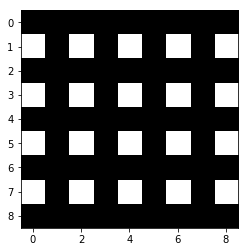

In [13]:
#task 2
import numpy as np
check = np.zeros((9, 9))
check[:, 1::2] = 1
check[1::2, ::2] = 1

import matplotlib.pyplot as plt
plt.imshow(check, cmap='gray', interpolation='nearest')

In [14]:
#task 3 IO, data types, color spaces
import skimage
from skimage import io
import os
filename = os.path.join(skimage.data_dir, 'camera.png')
camera = io.imread(filename)
logo = io.imread('https://scikit-image.org/_static/img/logo.png')
io.imsave('local_logo.png', logo)

from skimage import img_as_float
camera_float = img_as_float(camera)
print(camera.max(), camera_float.max())

#util.img_as_ubyte
#util.img_as_float

from skimage import filters
camera_sobel = filters.sobel(camera)
print(camera_sobel.max())

import scipy
face = scipy.misc.face()
print(face.shape)

#color.rgb2hsv
#color.lab2rgb

255 1.0
0.5915023652179584
(768, 1024, 3)


[[0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[0 0 0 0 0]
 [0 0 1 0 0]
 [0 1 1 1 0]
 [0 0 1 0 0]
 [0 0 0 0 0]]


E:\Anaconda\Anaconda3\lib\site-packages\skimage\restoration\_denoise.py:226: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  g[slices_g] = np.diff(out, axis=ax)
E:\Anaconda\Anaconda3\lib\site-packages\skimage\restoration\_denoise.py:212: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  d[slices_d] += p[slices_p]


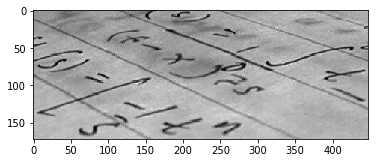

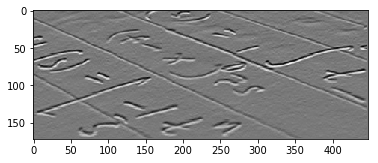

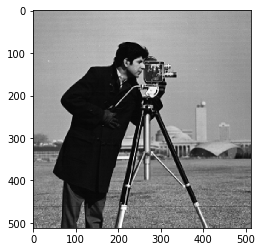

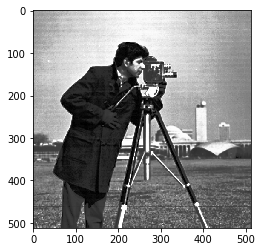

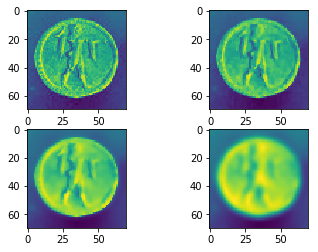

In [18]:
#task 4 Procissing
import numpy as np
from matplotlib import pyplot as plt
from skimage import data
text = data.text()
hsobel_text = filters.sobel_h(text)
plt.figure()
plt.imshow(text, cmap='gray')
plt.figure()
plt.imshow(hsobel_text, cmap='gray')

from skimage import exposure
camera = data.camera()
#Return image after histogram equalization.
camera_equalized = exposure.equalize_hist(camera)
plt.figure()
plt.imshow(camera, cmap='gray')
plt.figure()
plt.imshow(camera_equalized, cmap='gray')

from skimage import morphology
a = np.zeros((7, 7), dtype=np.uint8)
a[1:6, 2:5] = 1
print(a)
#diamond shape - neighbors with manhattan distance no greater than radius
#erosion - pixel replaced with minimum from neighbor
b = morphology.binary_erosion(a, morphology.diamond(1)).astype(np.uint8)
print(b)

a = np.zeros((5, 5), dtype=np.uint8)
a[2, 2] = 1
print(a)
#dilation - pixel replaced with maximum value from neighbor
b = morphology.binary_dilation(a, morphology.diamond(1)).astype(np.uint8)
print(b)

from skimage.morphology import disk
from skimage import filters
coins = data.coins()
coins_zoom = coins[10:80, 300:370]
#disk - euclidean distance fro center no greater than radius
median_coins = filters.median(coins_zoom, disk(1))

from skimage import restoration
tv_coins = restoration.denoise_tv_chambolle(coins_zoom, weight=0.1)
#gaussian blur
gaussian_coins = filters.gaussian(coins_zoom, sigma=2)
plt.figure()
plt.subplot(221)
plt.imshow(coins_zoom)
plt.subplot(222)
plt.imshow(median_coins)
plt.subplot(223)
plt.imshow(tv_coins)
plt.subplot(224)
plt.imshow(gaussian_coins)


[[ True  True]
 [ True  True]]


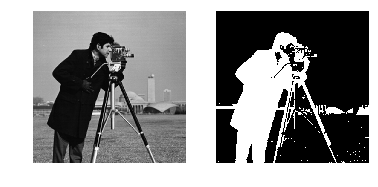

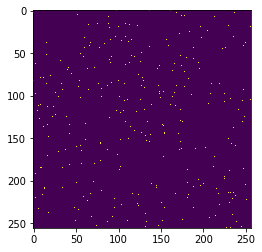

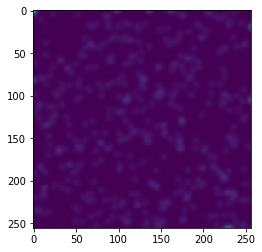

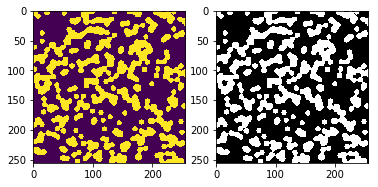

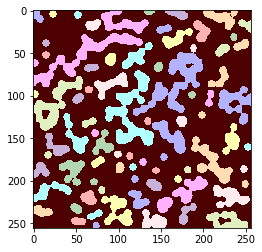

In [16]:
#task 5 Segmentation
from skimage import data
from skimage import filters
camera = data.camera()
#Otsu's method
#calculates the optimum threshold separating the two classes
#so that their intra-class variance is minimal
val = filters.threshold_otsu(camera)
mask = camera < val
plt.figure()
plt.subplot(121), plt.axis('off')
plt.imshow(camera, cmap='gray')
plt.subplot(122), plt.axis('off')
plt.imshow(mask, cmap='gray')

import numpy as np
n=20
l=256
#image 256x256
im=np.zeros((l,l))
#create 400 random points
points=l*np.random.random((2, n ** 2))
#set points on image
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
plt.figure()
plt.imshow(im)
#gaussian filter
im = filters.gaussian(im, sigma = l / (4. * n))
plt.figure()
plt.imshow(im)
blobs = im > im.mean()
print(blobs[0:2, 0:2])
plt.figure()
plt.subplot(121)
plt.imshow(blobs)
plt.subplot(122)
plt.imshow(blobs, cmap="gray")


from skimage import measure
from skimage import color
#Label connected regions of an integer array
all_labels = measure.label(blobs)
#returns array where connected regions are assigned to the same int
blobs_labels = measure.label(blobs, background=0)
#color-coded labels are painted over the image
image_label_overlay = color.label2rgb(blobs_labels, image=blobs)
plt.figure()
plt.imshow(image_label_overlay)

E:\Anaconda\Anaconda3\lib\site-packages\skimage\util\arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


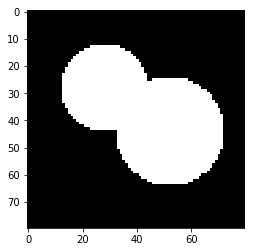

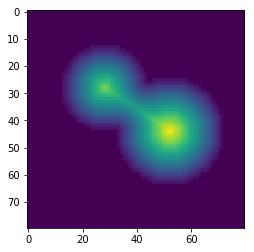

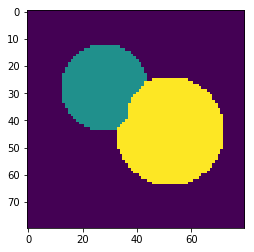

In [5]:
#task 6 Watermarks
from skimage import morphology
from skimage.feature import peak_local_max

#draw 2 overlapng circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1) ** 2 + (y - y1) ** 2 < r1 ** 2
mask_circle2 = (x - x2) ** 2 + (y - y2) ** 2 < r2 ** 2
image = np.logical_or(mask_circle1, mask_circle2)
plt.figure()
plt.imshow(image, cmap='gray')

from scipy import ndimage
#returns the smallest euclidean distance to the background (0) pixel 
distance = ndimage.distance_transform_edt(image)
#Find peaks (local maxima) in an image as coordinate list or boolean mas
#incdices=False returns bolean array with shape like image
#footprint reptesents local region within which to search for peaks at every point in image
#each unique region labels == value represents a unique region to search for peaks
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=image)
markers = morphology.label(local_maxi)
#image Data array where the lowest value points are labeled first
#markers array marking the basins with the values to be assigned in the label matrix
#mask Only points at which mask == True will be labeled
labels_ws = morphology.watershed(-distance, markers, mask=image)

plt.figure()
plt.imshow(distance)
plt.figure()
plt.imshow(labels_ws)

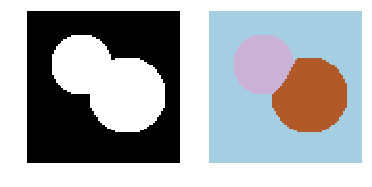

In [6]:
#task 7
from skimage import segmentation
markers[~image] = -1
labels_rw = segmentation.random_walker(image, markers)
plt.figure()
plt.subplot(121)
plt.axis('off')
plt.imshow(image, cmap='gray')
plt.subplot(122)
plt.axis('off')
plt.imshow(labels_rw, cmap='Paired')

E:\Anaconda\Anaconda3\lib\site-packages\skimage\util\arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


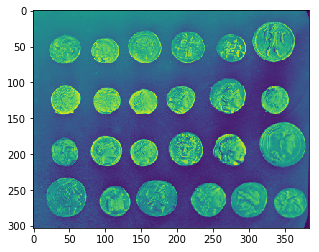

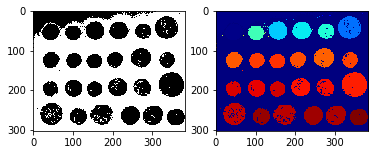

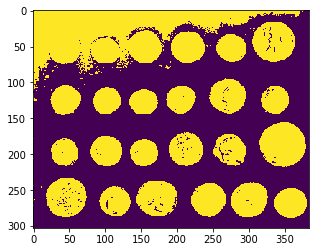

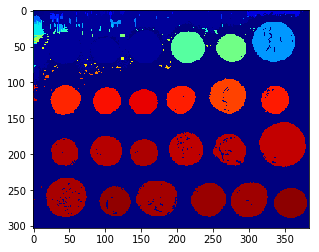

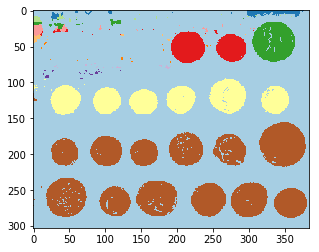

In [21]:
#task 8
from skimage import segmentation
from skimage import measure
coins = data.coins()
plt.figure()
plt.imshow(coins)

#Otsu
val = filters.threshold_otsu(coins)
coins_otsu = coins < val
plt.figure()
plt.subplot(121)
plt.imshow(coins_otsu, cmap='gray')
labels_otsu = measure.label(coins_otsu, background=1)
plt.subplot(122)
plt.imshow(labels_otsu, cmap='jet')

#coins = filters.median(coins)
#coins_mean = coins
coins_mean = coins > coins.mean()
plt.figure()
plt.imshow(coins_mean)

#Watershade
distance = ndimage.distance_transform_edt(coins_mean)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=coins)
markers = morphology.label(local_maxi)
labels_ws = morphology.watershed(-distance, markers, mask=coins_mean)
plt.figure()
plt.imshow(labels_ws, cmap='jet')

#Random walker
markers[~coins_mean] = -1
labels_rw = segmentation.random_walker(coins, markers)
plt.figure()
plt.imshow(labels_rw, cmap='Paired')

In [7]:
import numpy as np
a = np.array([[[1,2], [3, 4]], [[5, 6], [7, 8]]])
print(a[:,:])
f = lambda x: x[0] + x[1]
print(np.array([ f(x) for x in a]))
b = np.array([1, 1, 1])
print(b * 0)

median_b = 4
c = np.array([[1, 2, 3], [4, 5, 6]])
def g(x):
    if x[1] < median_b:
        print("less", x[1])
        print(median_b)
        return [0, 0, 0]
    else:
        print("more", x[1])
        return x
print(np.array([g(x) for x in c[:]]))

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
[[ 4  6]
 [12 14]]
[0 0 0]
less 2
4
more 5
[[0 0 0]
 [4 5 6]]


In [4]:
skimage?